In [1]:
# imports

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
#nltk.download()

In [2]:
# load dataframe
pd.set_option('display.max_colwidth', None)

file_name = 'Sarcasm_Headlines_Dataset.json'
df = pd.read_json(file_name, lines=True)

In [3]:
# view data
df.head(10)

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5,former versace store clerk sues over secret 'black code' for minority shoppers,0
1,https://www.huffingtonpost.com/entry/roseanne-revival-review_us_5ab3a497e4b054d118e04365,"the 'roseanne' revival catches up to our thorny political mood, for better and worse",0
2,https://local.theonion.com/mom-starting-to-fear-son-s-web-series-closest-thing-she-1819576697,mom starting to fear son's web series closest thing she will have to grandchild,1
3,https://politics.theonion.com/boehner-just-wants-wife-to-listen-not-come-up-with-alt-1819574302,"boehner just wants wife to listen, not come up with alternative debt-reduction ideas",1
4,https://www.huffingtonpost.com/entry/jk-rowling-wishes-snape-happy-birthday_us_569117c4e4b0cad15e64fdcb,j.k. rowling wishes snape happy birthday in the most magical way,0
5,https://www.huffingtonpost.com/entry/advancing-the-worlds-women_b_6810038.html,advancing the world's women,0
6,https://www.huffingtonpost.com/entry/how-meat-is-grown-in-a-lab_us_561d1189e4b0c5a1ce607e86,the fascinating case for eating lab-grown meat,0
7,https://www.huffingtonpost.com/entry/boxed-college-tuition-ben_n_7445644.html,"this ceo will send your kids to school, if you work for his company",0
8,https://politics.theonion.com/top-snake-handler-leaves-sinking-huckabee-campaign-1819578231,top snake handler leaves sinking huckabee campaign,1
9,https://www.huffingtonpost.com/entry/fridays-morning-email-inside-trumps-presser-for-the-ages_us_58a6e33ee4b07602ad53a315,friday's morning email: inside trump's presser for the ages,0


In [4]:
# shape of the data
df.shape

(26709, 3)

In [5]:
# count the words in headlines
data_len = df['headline'].apply(lambda x: len(x.split(' '))).sum()
print(f'There are {data_len} words in the headline')

There are 263026 words in the headline


In [6]:
# check the column names
df.columns

Index(['article_link', 'headline', 'is_sarcastic'], dtype='object')

In [7]:
# check the data types in the columns
df.dtypes

article_link    object
headline        object
is_sarcastic     int64
dtype: object

In [8]:
#checking the unique values in 'is_sarcastic' column
df.is_sarcastic.unique()

array([0, 1])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


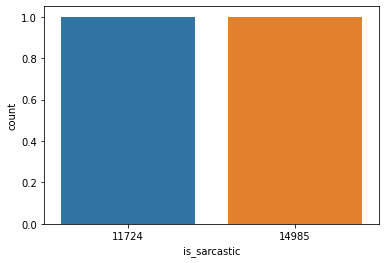

In [9]:
#checking the value counts in 'is_sarcastic' column
df.is_sarcastic.value_counts()
sns.countplot(df['is_sarcastic'].value_counts())
plt.show()

In [10]:
# check the null values in data
df.isna().sum() 

article_link    0
headline        0
is_sarcastic    0
dtype: int64

In [11]:
# delete 'article_link'column and check the data
del df['article_link']

df.head(10)

,headline,is_sarcastic
0,former versace store clerk sues over secret 'black code' for minority shoppers,0
1,"the 'roseanne' revival catches up to our thorny political mood, for better and worse",0
2,mom starting to fear son's web series closest thing she will have to grandchild,1
3,"boehner just wants wife to listen, not come up with alternative debt-reduction ideas",1
4,j.k. rowling wishes snape happy birthday in the most magical way,0
5,advancing the world's women,0
6,the fascinating case for eating lab-grown meat,0
7,"this ceo will send your kids to school, if you work for his company",0
8,top snake handler leaves sinking huckabee campaign,1
9,friday's morning email: inside trump's presser for the ages,0


In [12]:
#import necessary library

import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')

set_stopwords = set(stopwords.words("english"))


def clean_txt(text): # define the fuction with tokenization/string cleaning for all datasets 
                        
    text = re.sub(r"[^A-Za-z,!?]", " ", text)     
    text = re.sub(r'\[[^]]*\]'," ", text) 
    text = re.sub(r"\'s", "", text) 
    text = re.sub(r"\'t", "", text ) 
    text = re.sub(r"\'re", "",text) 
    text = re.sub(r"\'d", "", text) 
    text = re.sub(r"\'ll", " ",text) 
    text = re.sub(r",", " ", text) 
    text = re.sub(r"\(", " ", text) 
    text = re.sub(r"\)", " ", text) 
    text = re.sub(r"\'", " ", text)
    text = re.sub(r"aa", "", text)
    text = re.sub(r"zz", "", text)
    text = re.sub(r"[0-9]", ' ', text)
    text = text.lower()
    text = ' '.join(word for word in text.split() if word not in set_stopwords)
    return text

df['headline'] = df['headline'].apply(clean_txt)

data_clean_len = df['headline'].apply(lambda x: len(x.split(' '))).sum() 
print()
print(f'After text cleaning we have only {data_clean_len} words to work with')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.

After text cleaning we have only 187986 words to work with


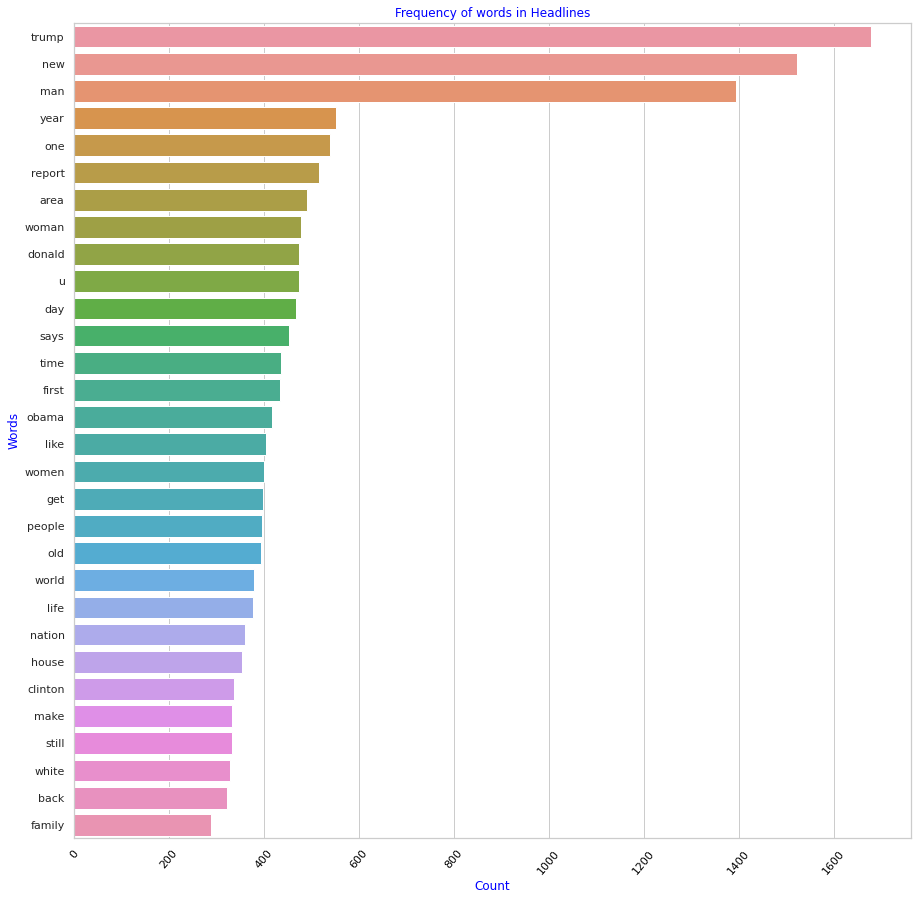

In [13]:
# visualize most common words

from collections import Counter #import Counter for finding most common words
import seaborn as sns #import searbon for vizualization result

text = df['headline']
words = text.str.split(expand=True).unstack()
result_count = Counter(words).most_common()
result_df = pd.DataFrame(result_count).reset_index().drop(0)

#vizualize result
sns.set_theme(style="whitegrid") 
f, ax = plt.subplots(figsize=(15, 15)) 
sns.barplot(y=result_df[0][0:30], x=result_df[1][0:30], data=result_df, palette=None)
plt.ylabel('Words', color="blue")  # Add an x-label to the axes.
plt.xlabel('Count', color="blue")  # Add a y-label to the axes.
plt.title("Frequency of words in Headlines", color="blue") 
plt.xticks(rotation=50);
ax.tick_params(axis='x', colors='black')
plt.show()

In [28]:
# create DataFrame for sarcastic and non_sarcastic words 
sarcastic = pd.DataFrame(df[df['is_sarcastic']==1]['headline'].str.split(expand=True).unstack().value_counts()).reset_index()
non_sarcastic = pd.DataFrame(df[df['is_sarcastic']==0]['headline'].str.split(expand=True).unstack().value_counts()).reset_index()

In [29]:
def visualize(data, dataframe_name):
  sns.set_theme(style="whitegrid") 
  f, ax = plt.subplots(figsize=(15, 10)) 
  sns.barplot(y=data['index'][0:30], x=sarcastic[0][0:30], data=result_df, palette=None)
  plt.ylabel('Words', color="blue")  # Add an x-label to the axes.
  plt.xlabel('Count', color="blue")  # Add a y-label to the axes.
  plt.title("Frequency of {} words in Headlines".format(dataframe_name), color="blue") 
  plt.xticks(rotation=70);
  plt.show()

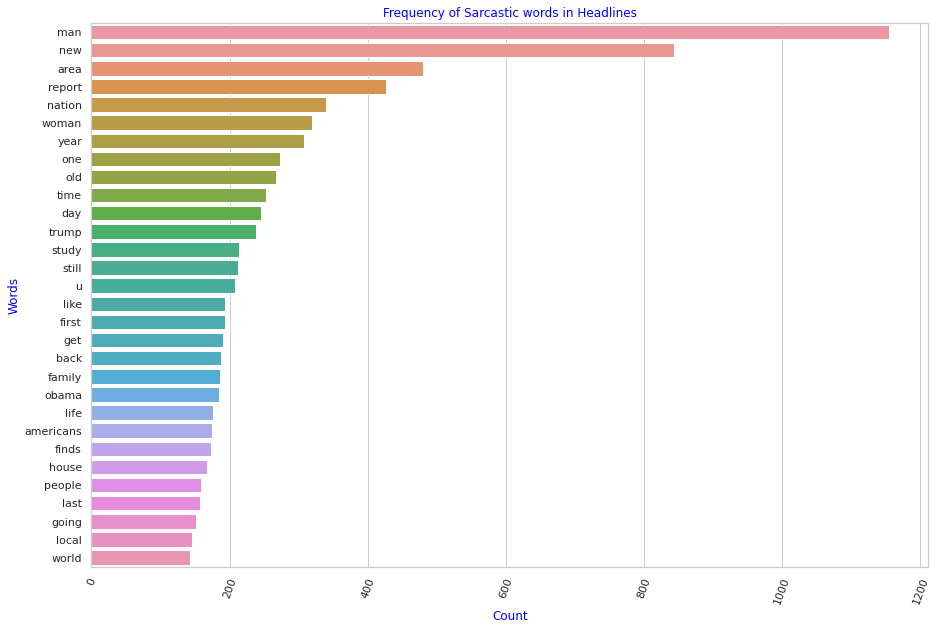

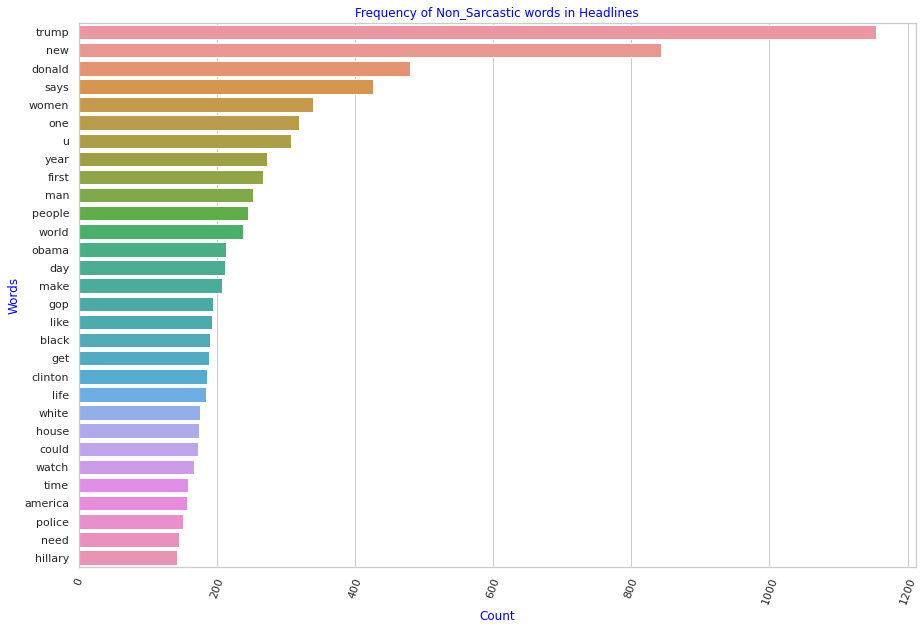

In [30]:
visualize(sarcastic, 'Sarcastic')
visualize(non_sarcastic, 'Non_Sarcastic')

In [18]:
# visualize WordCloud
from wordcloud import WordCloud, STOPWORDS

def visualizeWordCloud(data, name):
  plt.figure(figsize=(15,10))
  wordcloud = WordCloud(width=1000, height=500,
                        max_words=300, min_font_size = 10,
                        background_color="black",
                        stopwords = stopwords, 
                        ).generate(' ' .join(word for word in data))

  plt.imshow(wordcloud, interpolation='bilinear')
  plt.title('Wordcloud of {} Words'.format(name), color="black")
  plt.axis("off")
  plt.show()

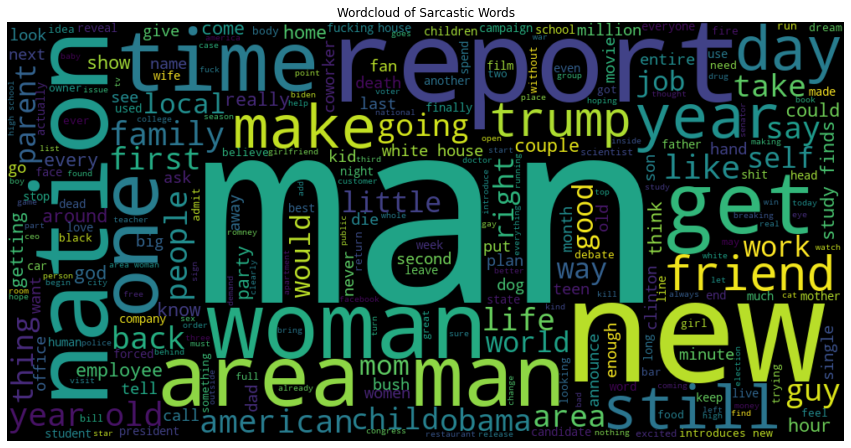

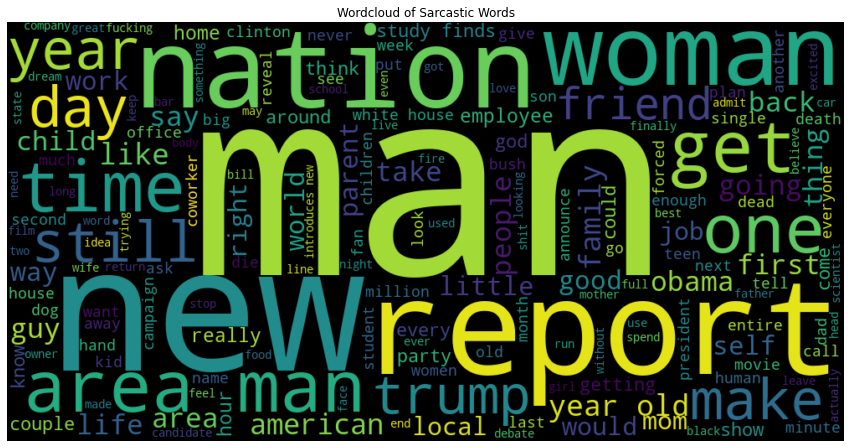

In [31]:
visualizeWordCloud(df[df['is_sarcastic']==1]['headline'], 'Sarcastic')
visualizeWordCloud(df[df['is_sarcastic']==0]['headline'], 'Sarcastic')